# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
)

import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [3]:
data = pd.read_csv("Loan_Modelling.csv")   ##  Complete the code to read the data

df = data.copy()

#let's drop the ID Column, since it won't add to our analysis
df.drop('ID', axis=1, inplace=True)

## Data Overview

* Observations
* Sanity checks

In [4]:
# viewing the first 5 rows of the data
df.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
#data shape
df.shape

(5000, 13)

In [6]:
# checking datatypes and number of non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [7]:
# checking for missing values
df.isnull().sum()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [8]:
# Let's look at the statistical summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


In [9]:
# checking datatypes and number of non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

In [10]:
#lets create some helpful functions so we can explore the data:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram


# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Univerate Analysis

In [11]:

#now lets run the analysis, first lets separate categorical and numerical data so we can run specific analysis on each of them.
numerical_cols = ['Age', 'Experience',  'Income', 'CCAvg', 'Mortgage']
categorical_cols = ['Family', 'Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']

#for zip code, since it has so many values, is better to analyse it separetly
large_categorical = ['ZIPCode']

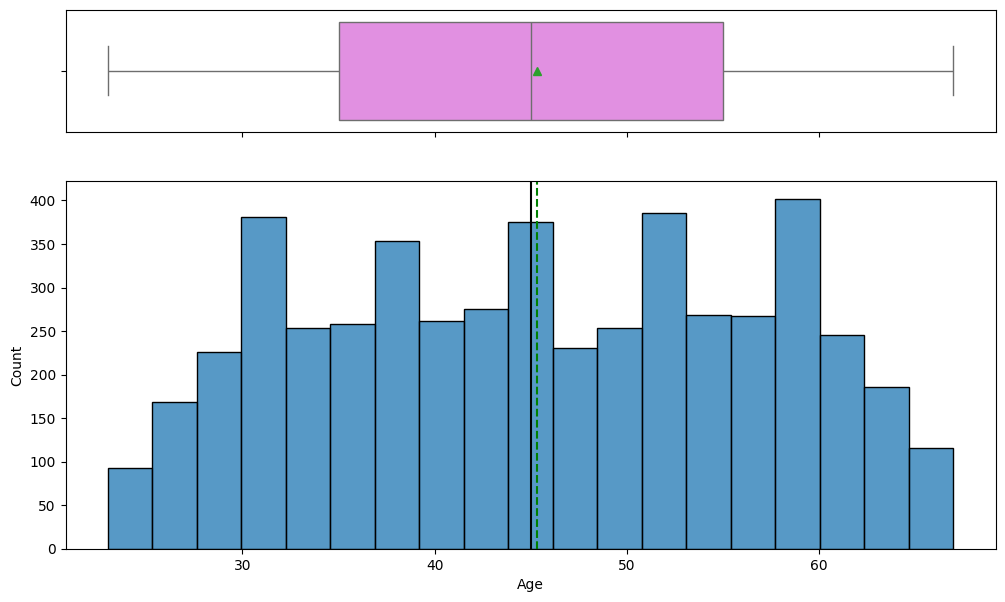

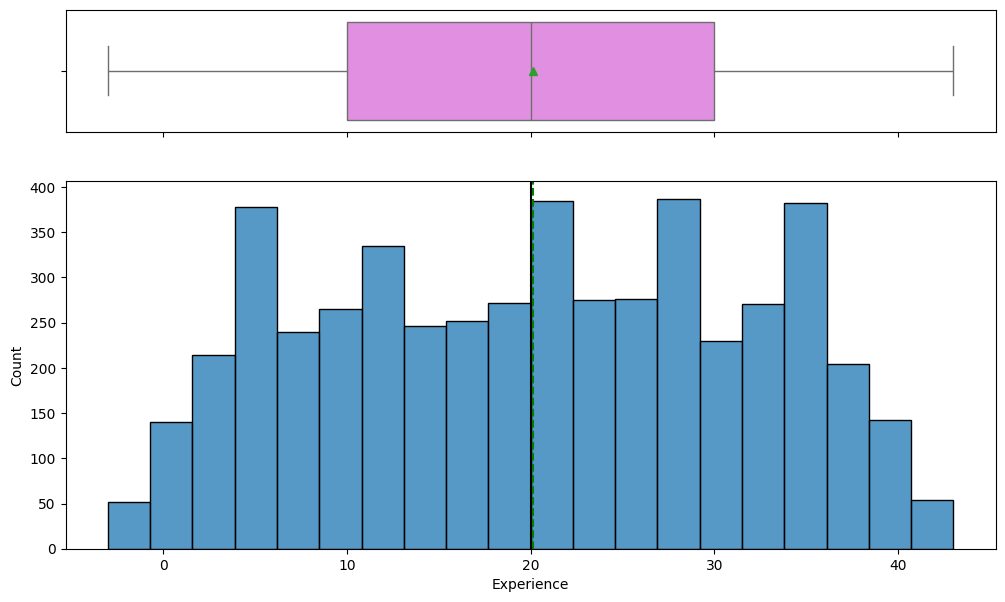

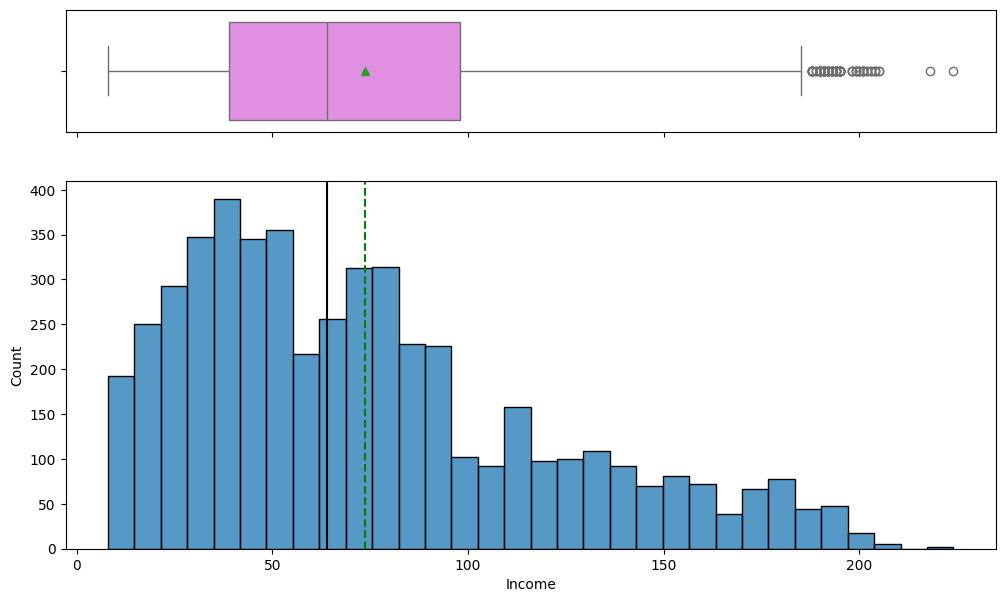

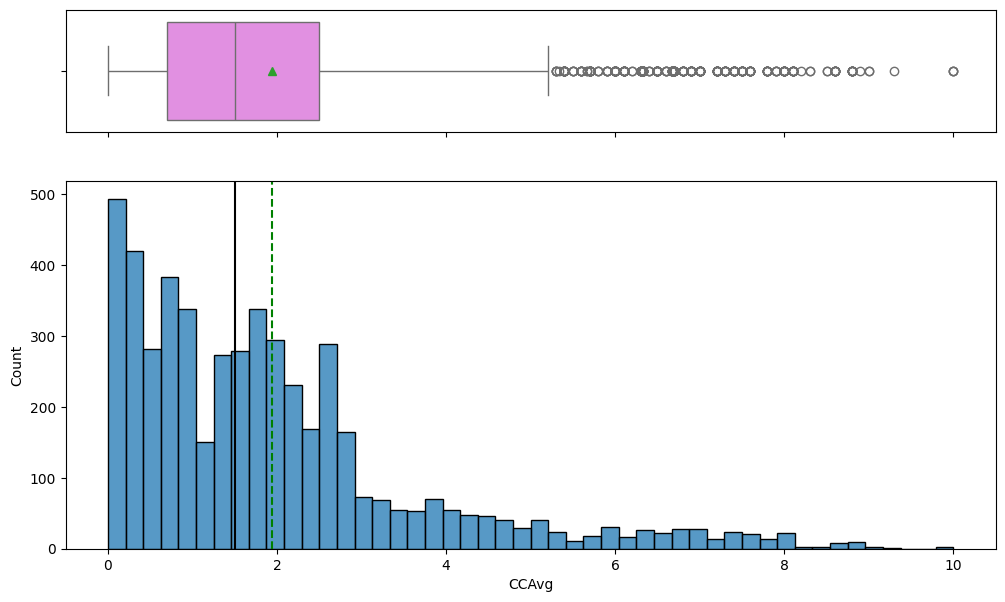

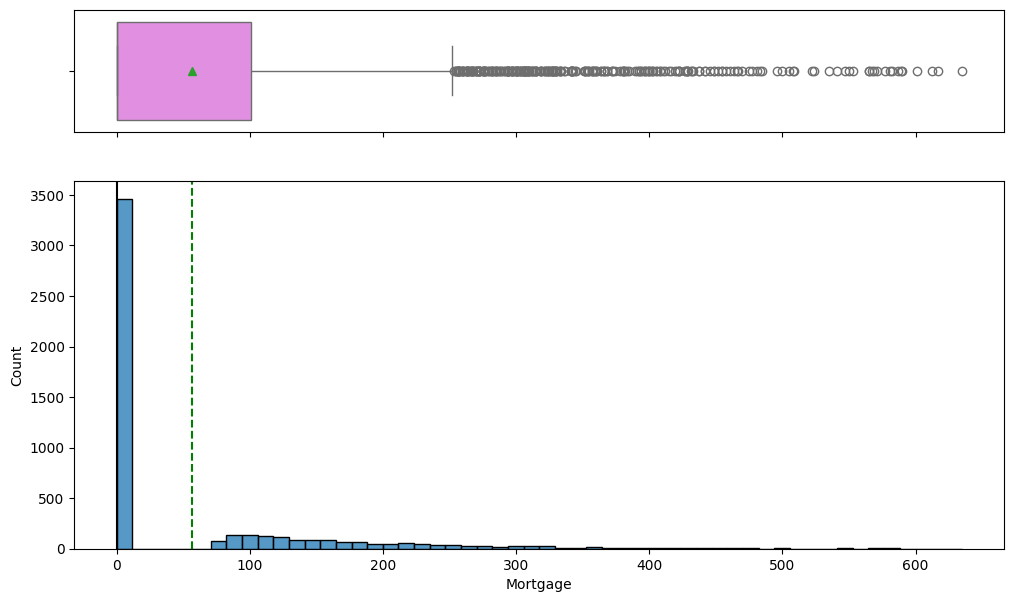

In [12]:
#Lets run the analysis for numerical data
for col in numerical_cols:
    histogram_boxplot(df, col)

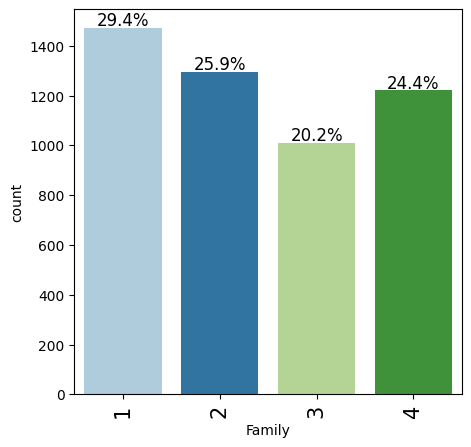

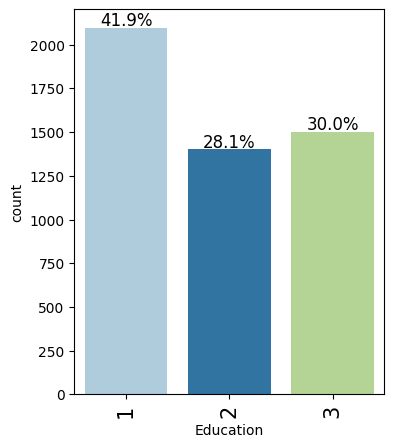

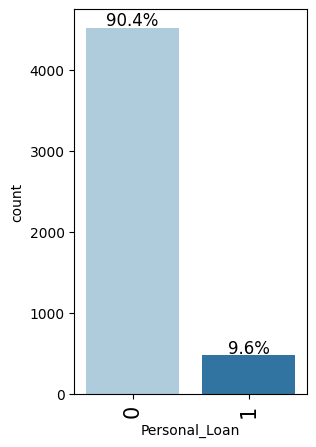

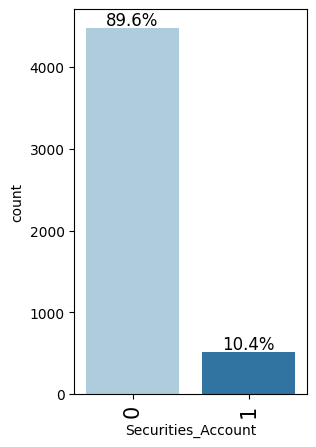

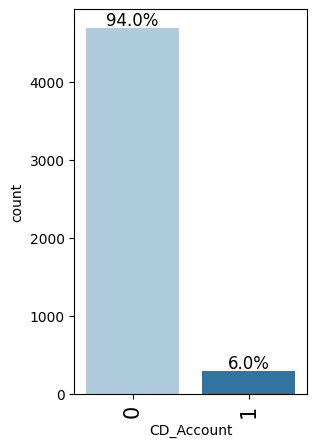

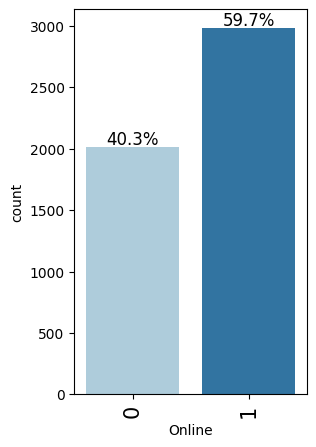

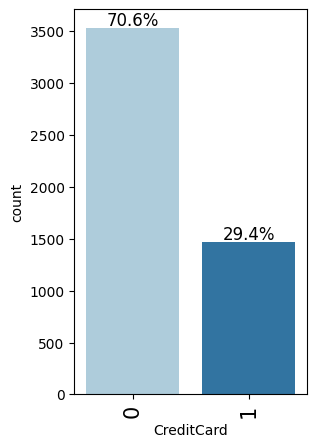

In [13]:
#Lets run the analysis for categorical data
for col in categorical_cols:
    labeled_barplot(data, col, perc=True)

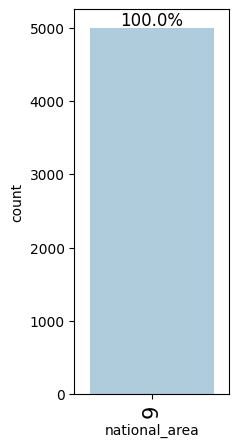

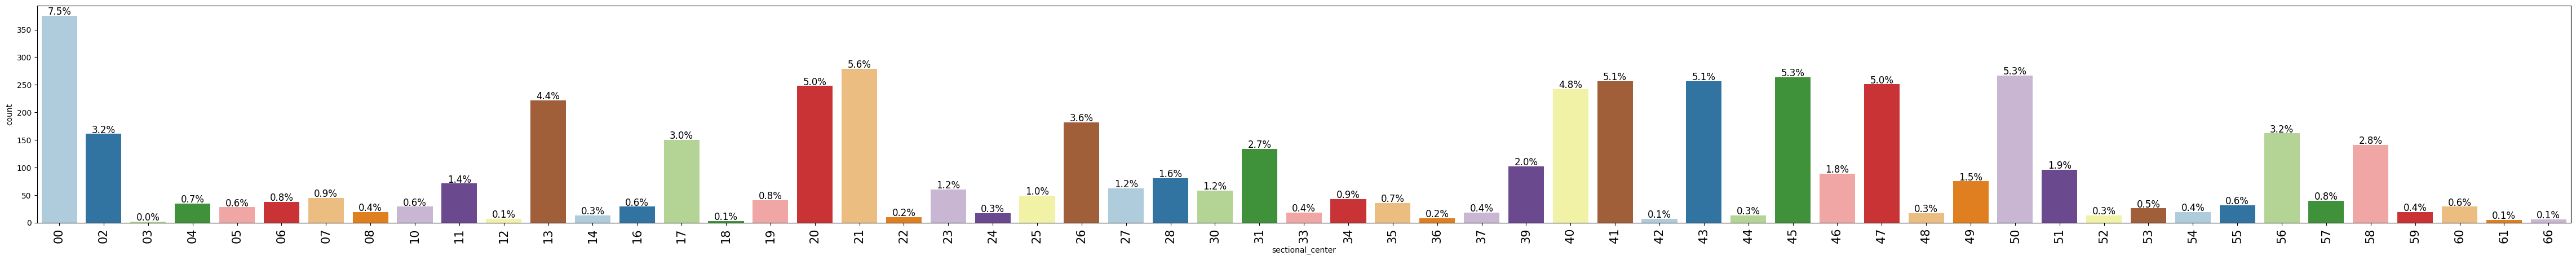

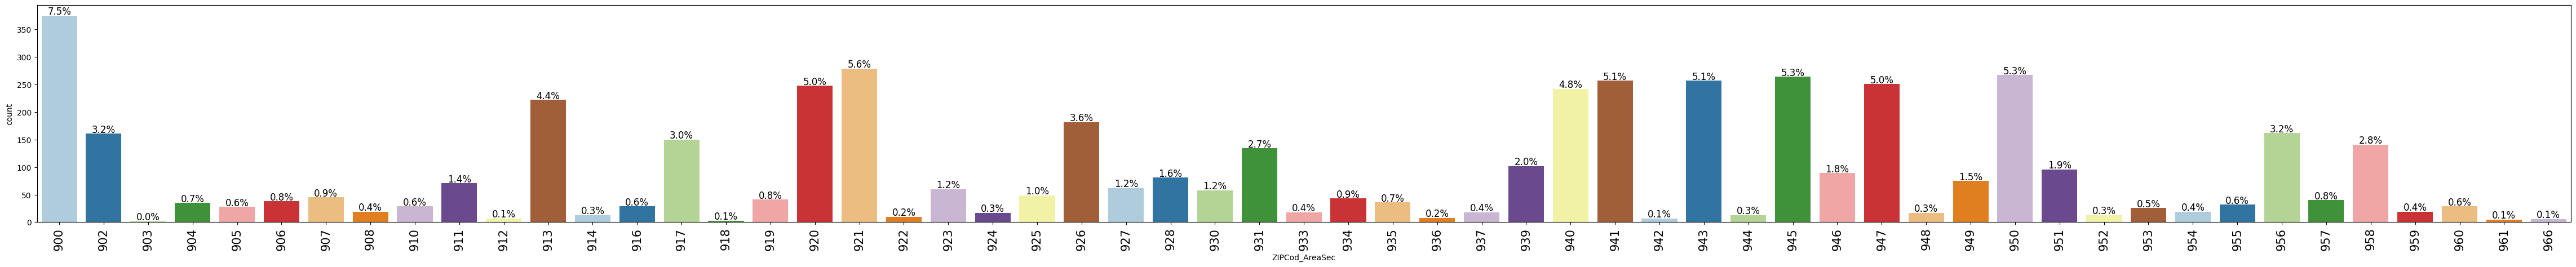

In [14]:
#Let's explore just the zip code now
#Since we have many number lets decoponse the zip code to city and state

# Convert the ZIPCode column to string type
df['ZIPCod_Str'] = df['ZIPCode'].astype(str)

# Extract the components
df['national_area'] = df['ZIPCod_Str'].str[0]
df['sectional_center'] = df['ZIPCod_Str'].str[1:3]

#now that we have the zip broken down we can check what is the area distribution
labeled_barplot(df, 'national_area', perc=True)

#Since there is only one area, lets take a look a the sectional center (that can be mapped to a specific state region)
labeled_barplot(df, 'sectional_center', perc=True)

#We can use this combination to identify a close region
df['ZIPCod_AreaSec'] = df['ZIPCod_Str'].str[0:3]

#checking the distribuiton to see if there is no error
labeled_barplot(df, 'ZIPCod_AreaSec', perc=True)



### Bivariate Analysis
Before we move on we need to do the next layer of analysis.

In [15]:
#Lets define a few useful functions so we can start our analis
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

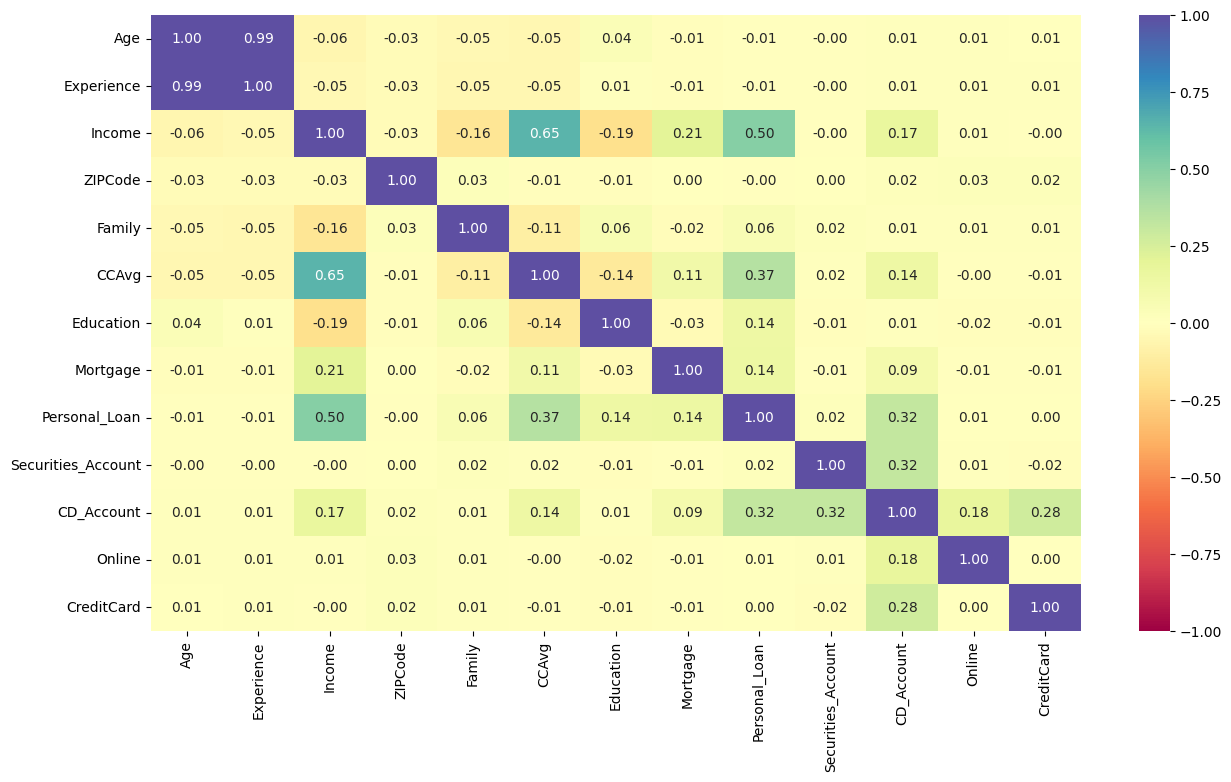

In [16]:
#now lets check how the variables compare to each other.
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral") # Complete the code to get the heatmap of the data
plt.show()

Executing analysis for: Family vs Personal_Loan
Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


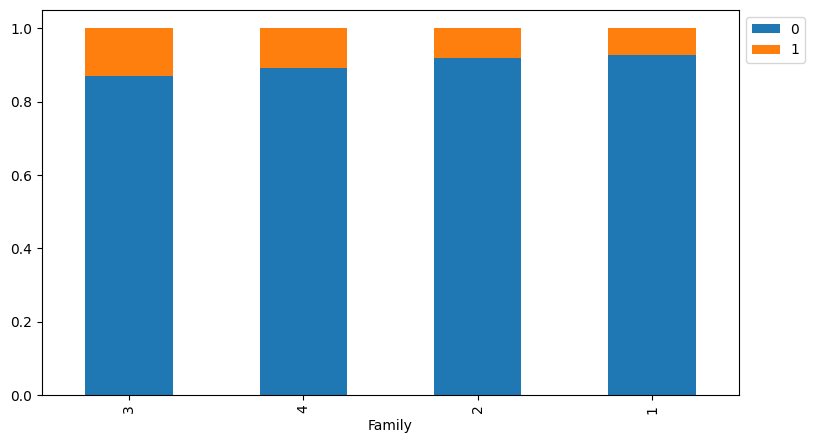

Executing analysis for: Education vs Personal_Loan
Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


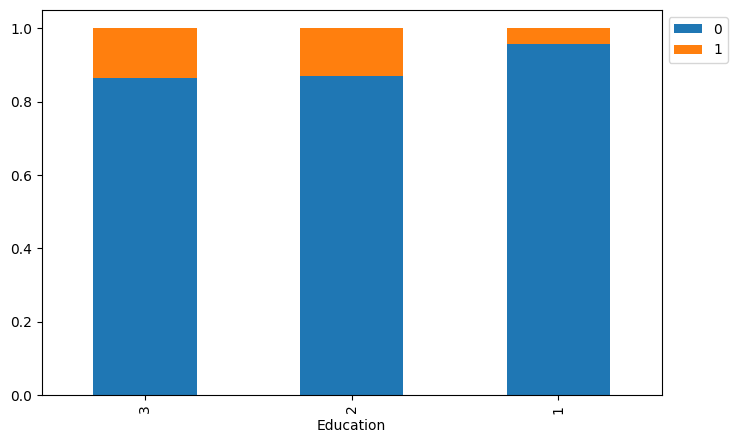

Executing analysis for: Online vs Personal_Loan
Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


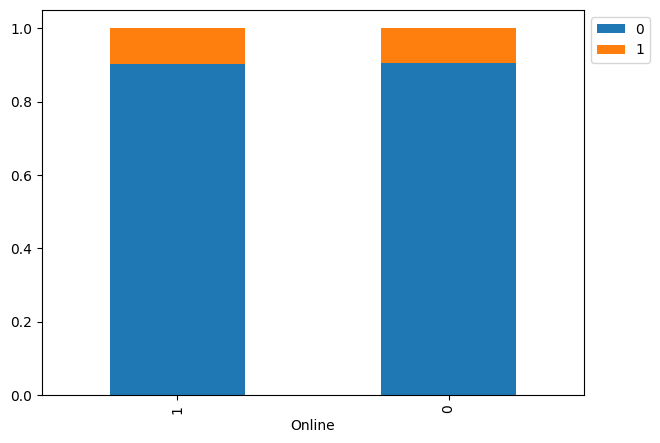

Executing analysis for: CreditCard vs Personal_Loan
Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


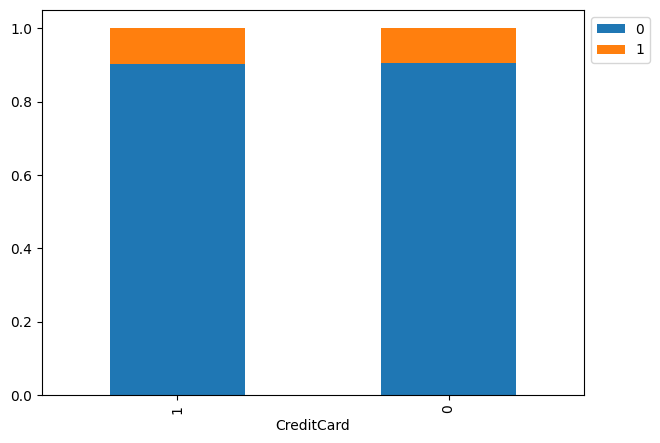

Executing analysis for: ZIPCod_AreaSec vs Personal_Loan
Personal_Loan      0    1   All
ZIPCod_AreaSec                 
All             4520  480  5000
900              337   38   375
950              231   36   267
920              216   32   248
943              228   29   257
947              224   27   251
913              198   24   222
945              241   23   264
921              256   23   279
926              160   22   182
941              238   19   257
940              224   18   242
902              147   14   161
958              129   12   141
939               91   11   102
951               85   11    96
949               64   11    75
911               61   10    71
930               49    9    58
931              125    9   134
917              142    8   150
956              154    8   162
946               83    6    89
957               35    5    40
906               33    5    38
934               38    5    43
935               32    4    36
928             

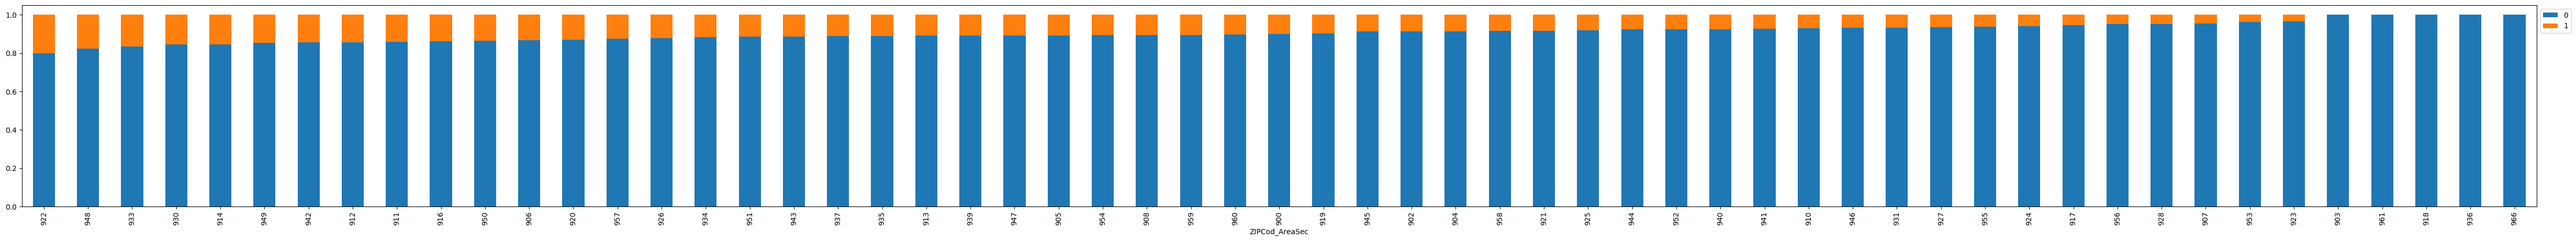

Executing analysis for: Securities_Account vs Personal_Loan
Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


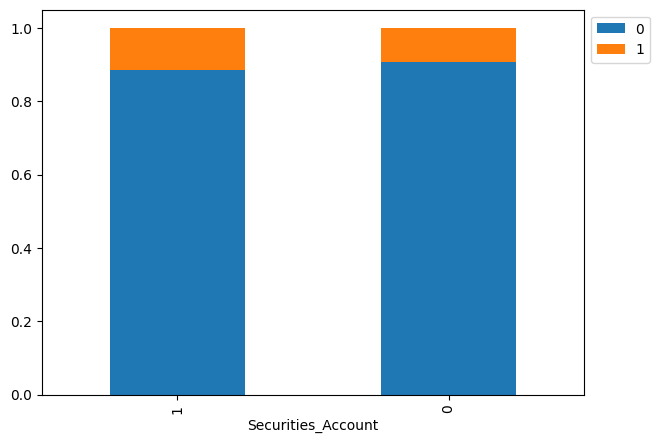

Executing analysis for: CD_Account vs Personal_Loan
Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


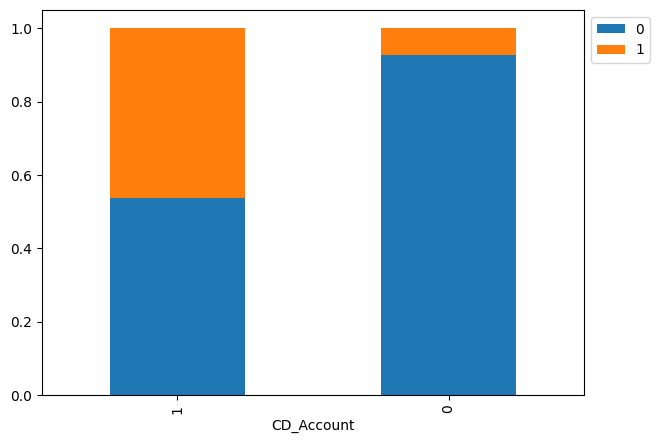

Executing analysis for: Age vs Personal_Loan


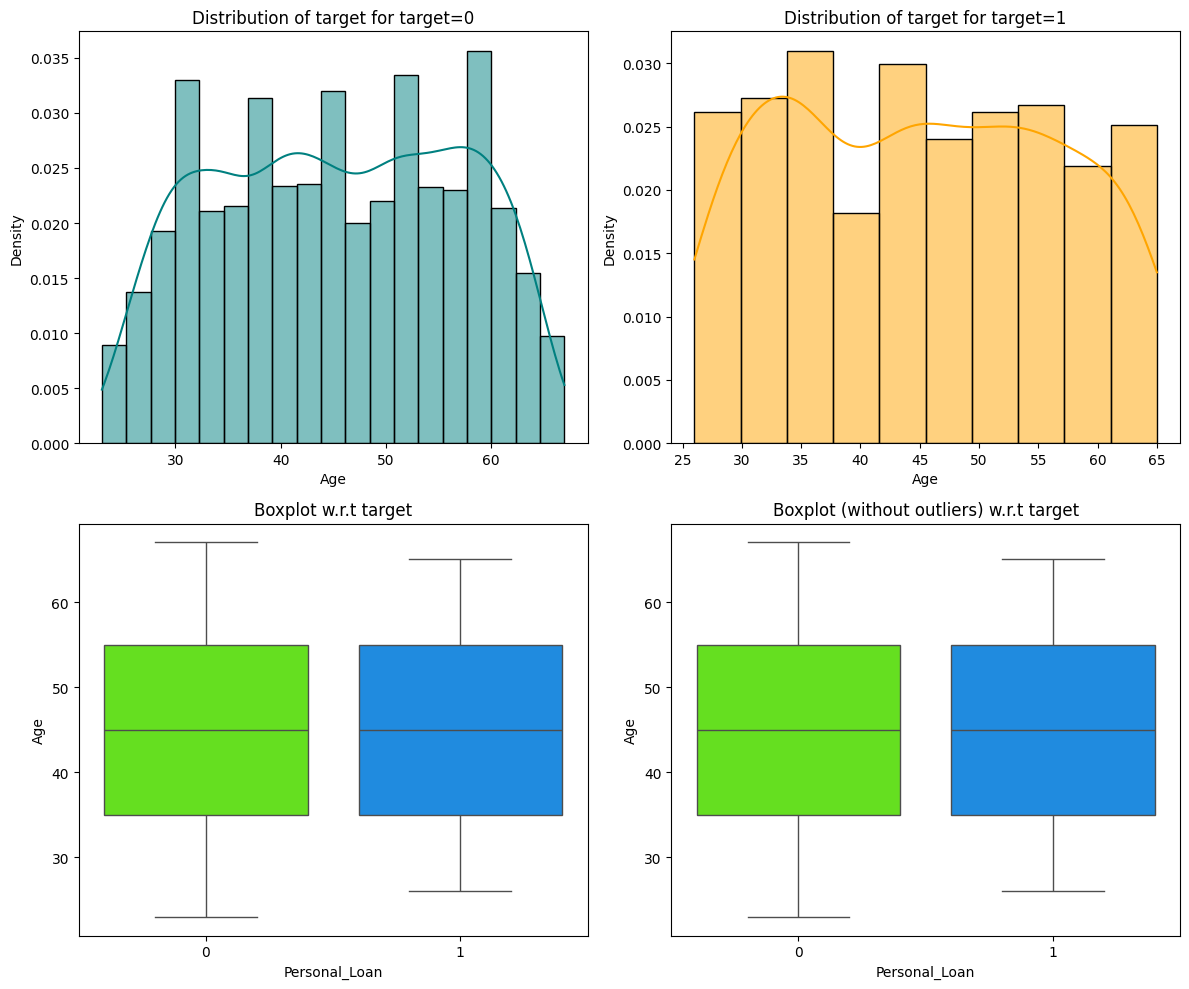

Executing analysis for: Experience vs Personal_Loan


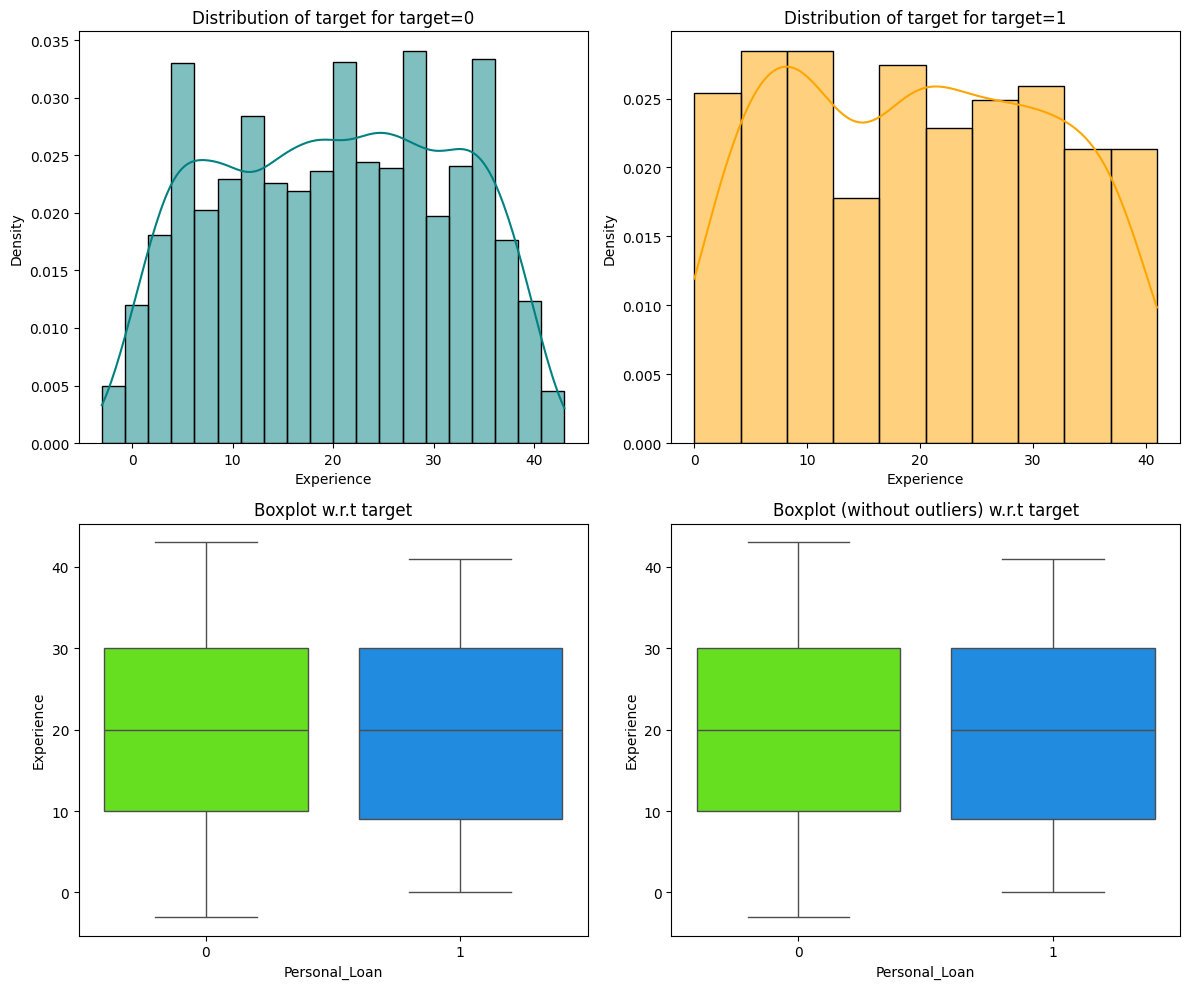

Executing analysis for: Income vs Personal_Loan


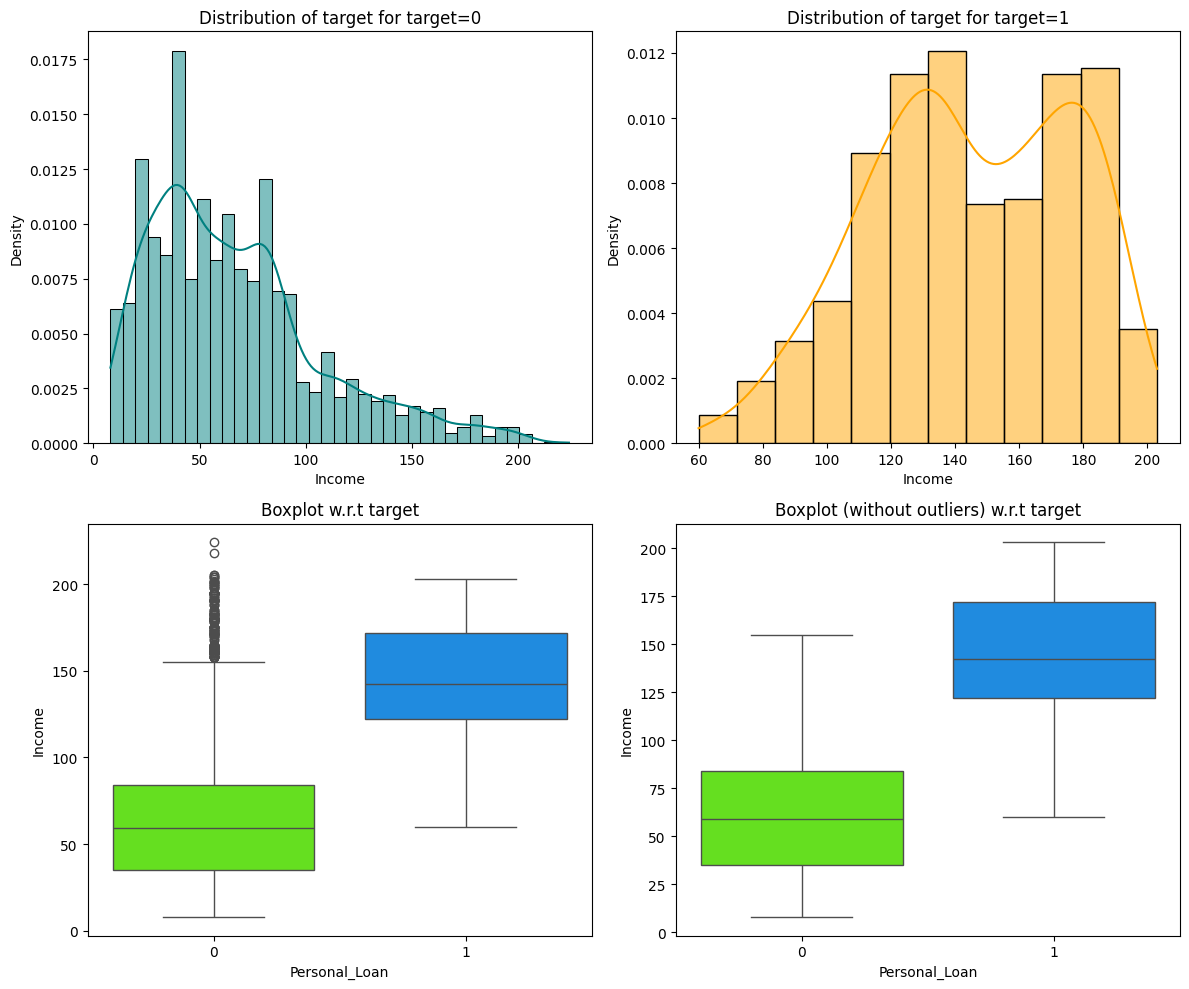

Executing analysis for: CCAvg vs Personal_Loan


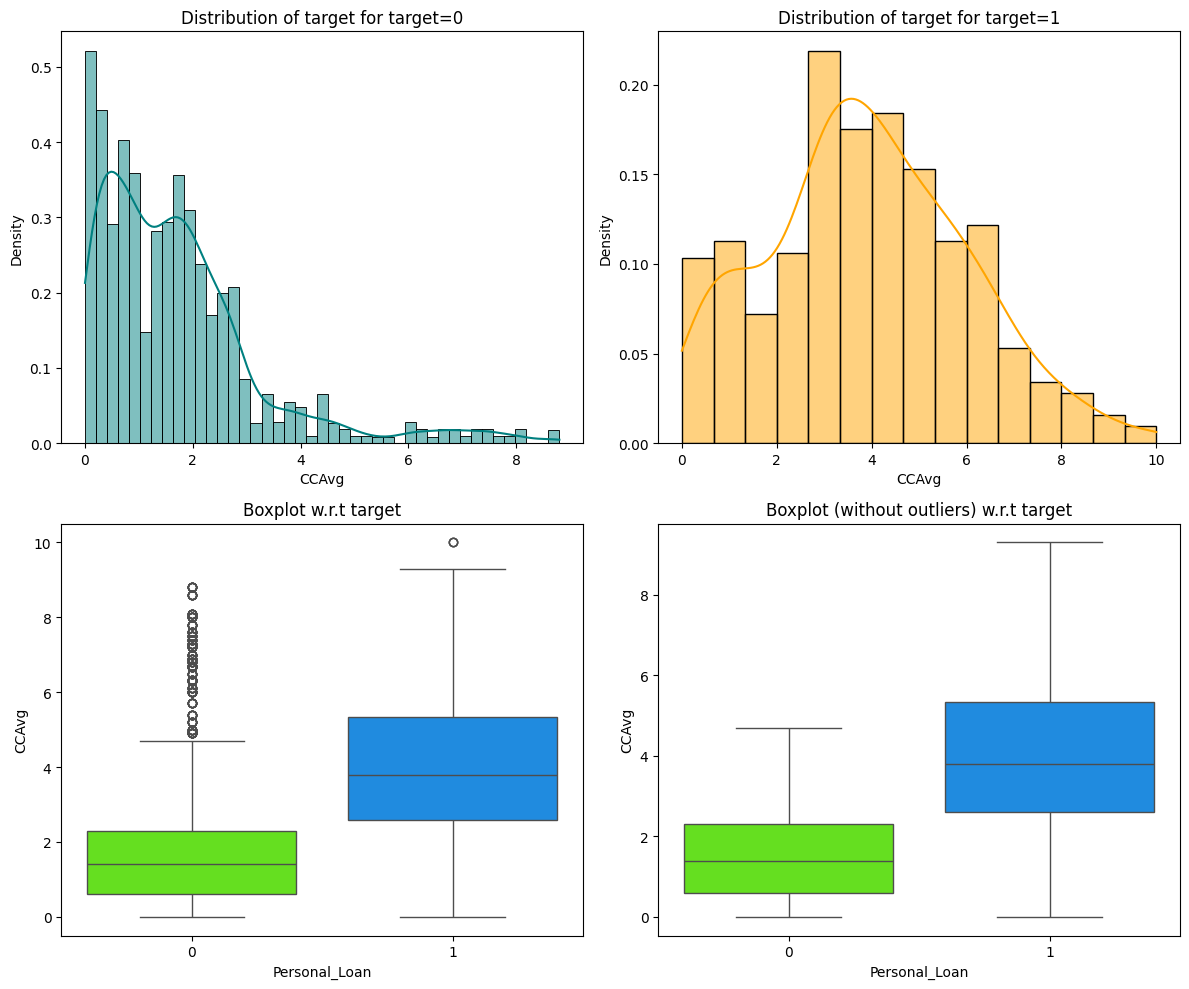

Executing analysis for: Mortgage vs Personal_Loan


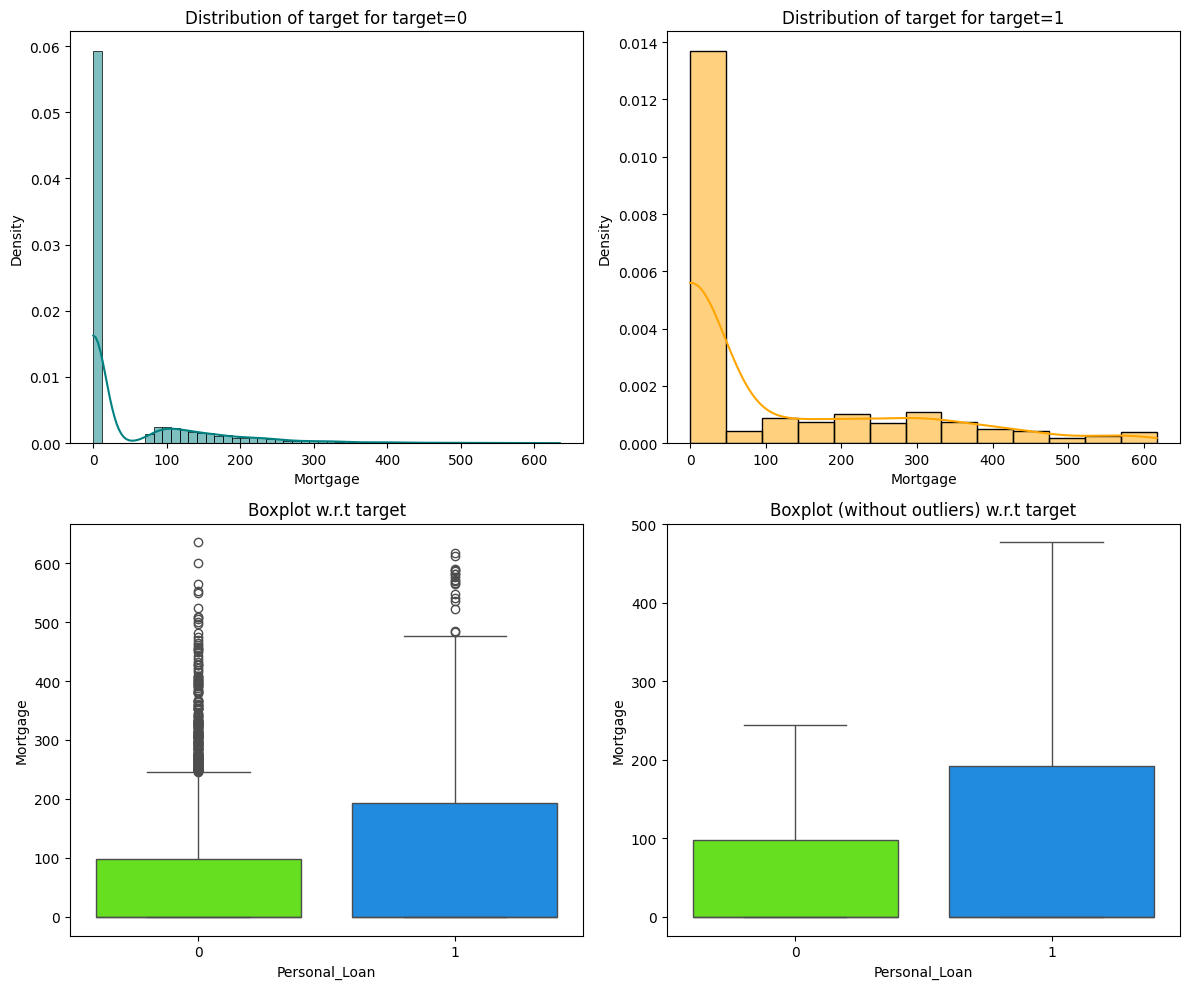

In [17]:
numerical_cols = ['Age', 'Experience',  'Income', 'CCAvg', 'Mortgage']
predictors = ['Family', 'Education',  'Online', 'CreditCard', "ZIPCod_AreaSec", 'Securities_Account', 'CD_Account']
targets = ['Personal_Loan']

#lets run the analysis for all the categorial elements
for predictor in predictors:
    for target in targets:
        print(f"Executing analysis for: {predictor} vs {target}")
        stacked_barplot(df, predictor, target)


#lets run the analysis for all the target vs 
for col in numerical_cols:
    for target in targets:
        print(f"Executing analysis for: {col} vs {target}")
        distribution_plot_wrt_target(df, col, target)

### Answering the questions initialy asked.


In [18]:
#count the number of clients with credit card
df.groupby("CreditCard").count()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,ZIPCod_Str,national_area,sectional_center,ZIPCod_AreaSec
CreditCard,,,,,,,,,,,,,,,,
0,3530,3530,3530,3530,3530,3530,3530,3530,3530,3530,3530,3530,3530,3530,3530,3530
1,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470


**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?

    A: The mortgage is follows a interesting distribution, there is a high number of clients with no mortgage at all, but if disconder them , we have a right skiwed distribuiton, impling that the is a big distribuiton of the data.

2. How many customers have credit cards?

    A: 29.4% of the customers have credit card, that is a total of 1470 clients that have credit card.

3. What are the attributes that have a strong correlation with the target attribute (personal loan)?

    A: There are no atributs with a strong corelation with the target atribute, the income is the one that has the most correlation with a 0.5 positive correlation.

4. How does a customer's interest in purchasing a loan vary with their age? 

    A: When we look at the data there are two age groups that seem to have moere interest (Around 35 and 43 years), but is not a big peak in interest.

5. How does a customer's interest in purchasing a loan vary with their education?

    A: We can see a correlation on the data, the higher the education more intereset on the purchasing a loan the difference is bigger between undergrad and Graduate, that it is between Graduate and Advanced/professional, but both Graduate and Adavenced/Profession have lots more interest in purchasing loans.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

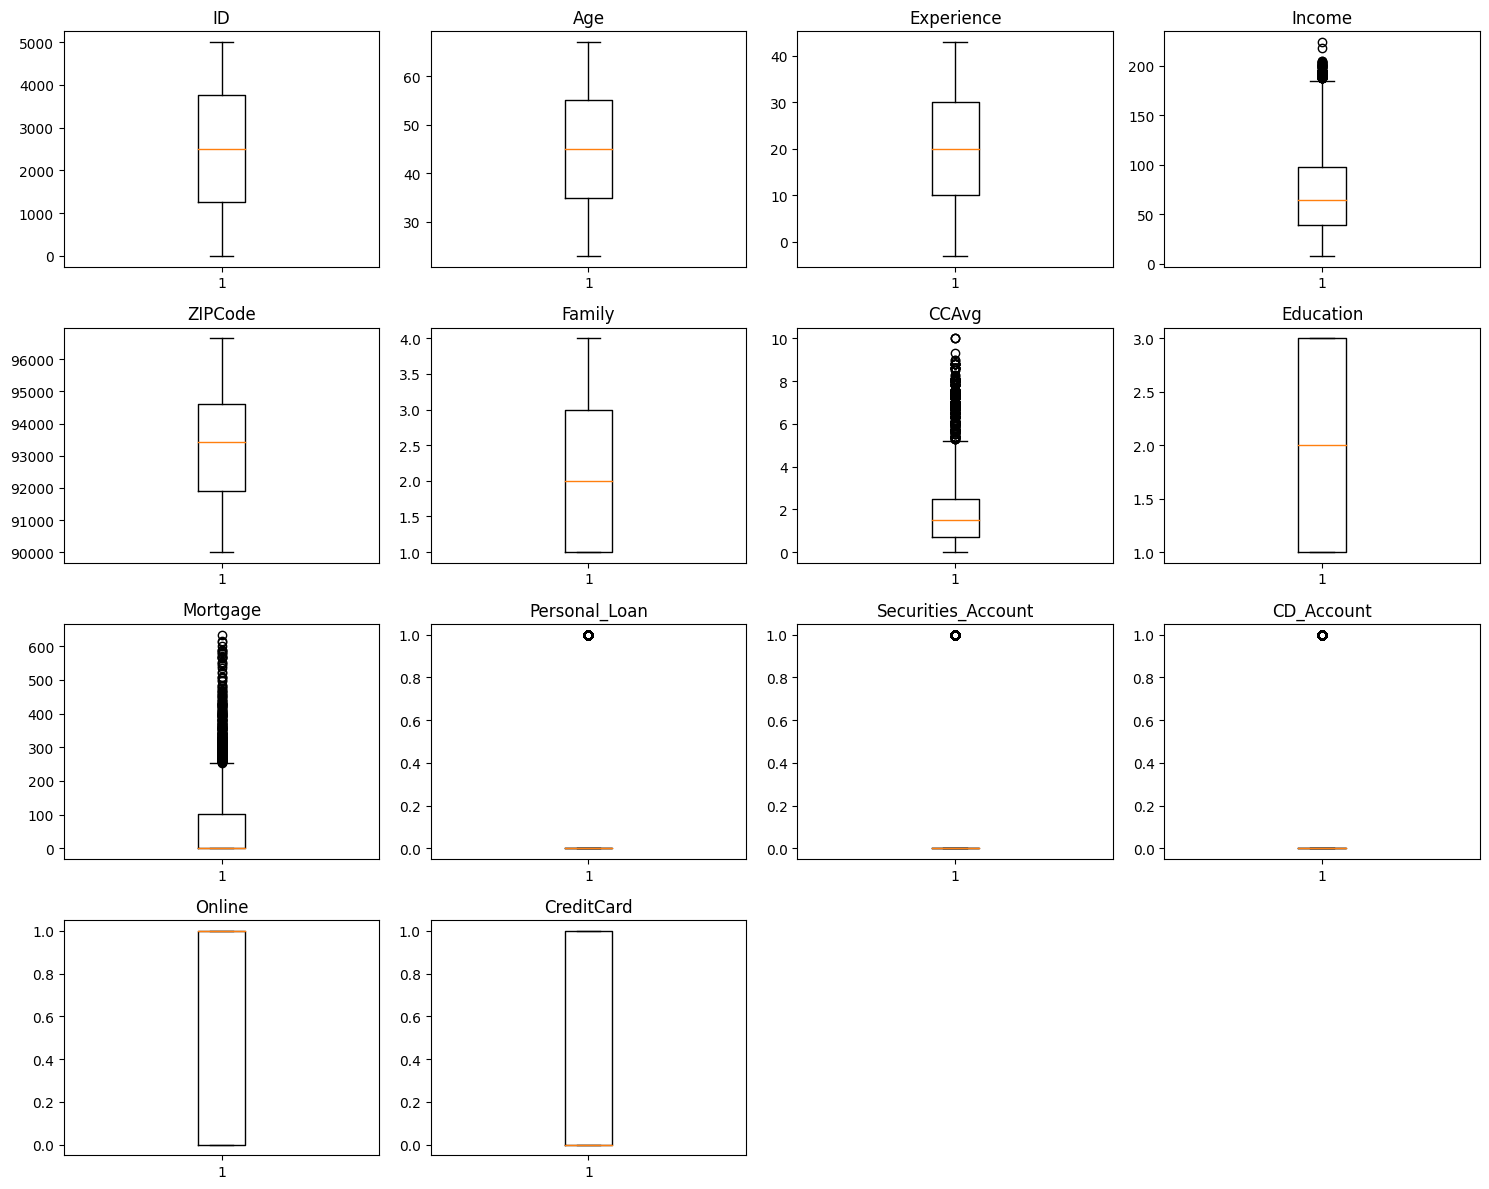

In [19]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

There are a few fields who have outliers but they appear to be propper data so we won't be removing them.

In [20]:
#looking at the data we can drop the experience since it has a high correlation with the age, also we have decided to keep only the partial zip code for the first part of the model
model_data = df.drop(["Experience", "ZIPCode"], axis=1).copy()

X = model_data.drop("Personal_Loan", axis=1)
Y = model_data["Personal_Loan"]

X = pd.get_dummies(X, columns=["ZIPCod_AreaSec", "Education"], drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

#lets check the shape of the data now
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 70)
Shape of test set :  (1500, 70)
Percentage of classes in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


In [21]:
# Lets create the functions to calculate the performance of the models:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

def confusion_matrix_sklearn(model, predictors, target, label = ""):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.title(f"{label} Confusion Matrix")

#Plot the Decision tree, so we can visualize it
def print_tree (model, feature_names):
    plt.figure(figsize=(20, 15))
    out = tree.plot_tree(
        model,
        feature_names=feature_names,
        filled=True,
        fontsize=9,
        node_ids=False,
        class_names=None,
    )
    # Correct the arrow.
    for o in out:
        arrow = o.arrow_patch
        if arrow is not None:
            arrow.set_edgecolor("black")
            arrow.set_linewidth(1)
    plt.show()

#Create print the confusion matrix and also calculate the performance and return it so we can leverage it on futuere comparisons
def model_performance_review(model, X, Y, label = ""):
    confusion_matrix_sklearn(model, X, Y, label)
    performance_review = model_performance_classification_sklearn(model, X, Y)
    print(performance_review)
    return performance_review
    

## Model Building

### Model Evaluation Criterion

* Since we want to make sure we maximize the campain our focus should be on maximizing recall


### Model Building

In [22]:
#now we can build the model
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

Trainig Data Results
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing Data Results
   Accuracy    Recall  Precision        F1
0  0.981333  0.872483   0.935252  0.902778


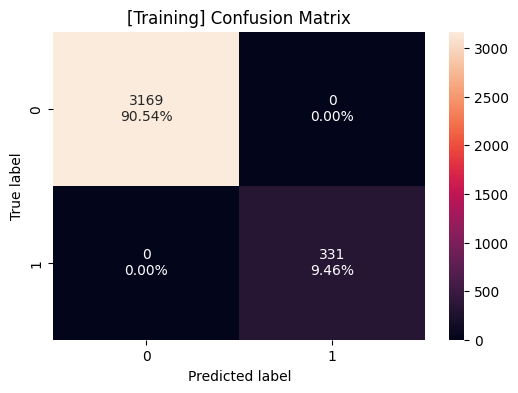

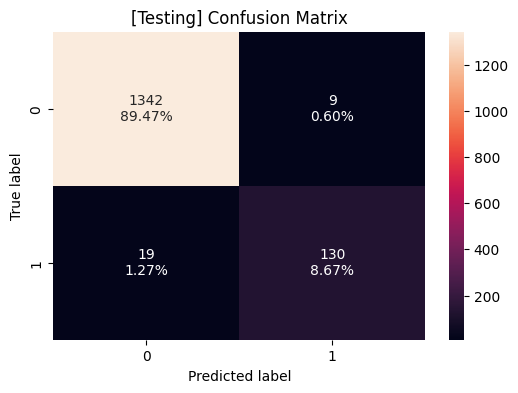

In [23]:
#With the model build, time to check the performance
print("Trainig Data Results")
decision_tree_perf_train_initial = model_performance_review(model, X_train, y_train, "[Training]")

print("Testing Data Results")
decision_tree_perf_test_initial = model_performance_review(model, X_test, y_test, "[Testing]")

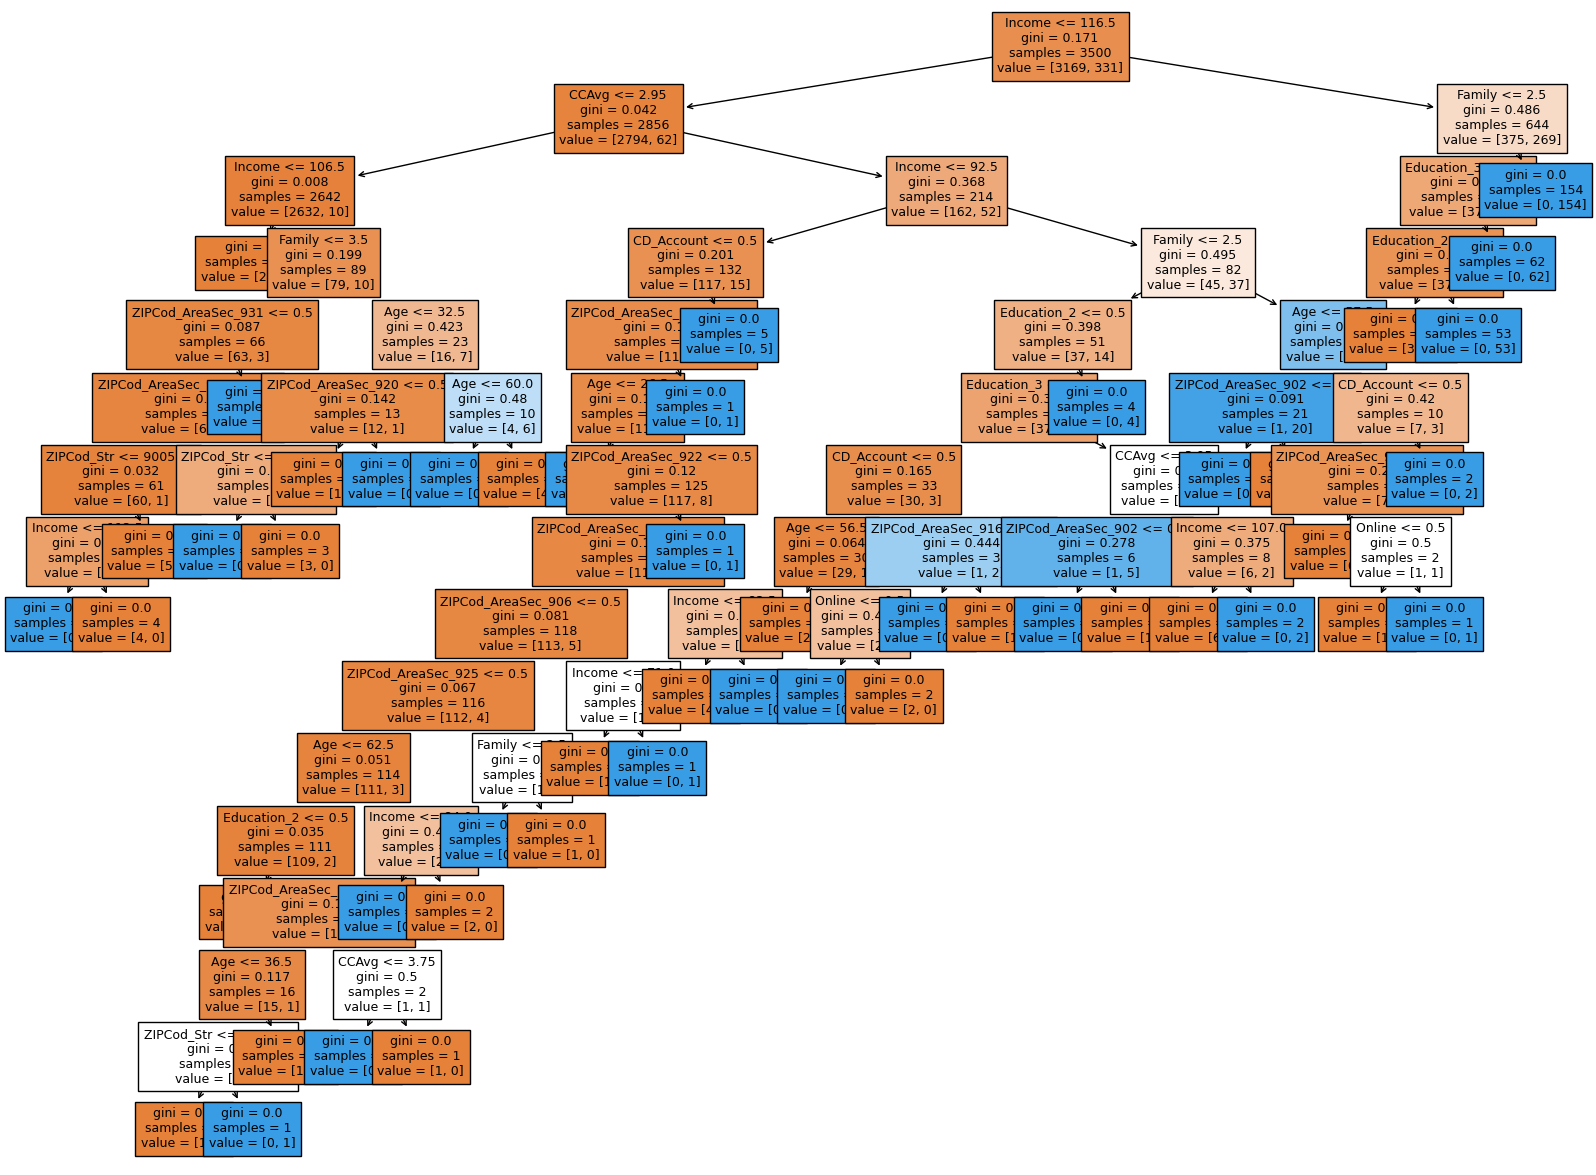

In [24]:
#let's print the tree and check how it is
print_tree(model, list(X_train.columns))

### Model Performance Improvement

                         Imp
Income              0.313832
Family              0.248530
Education_2         0.163190
Education_3         0.144207
CCAvg               0.043357
Age                 0.029118
CD_Account          0.021361
ZIPCod_AreaSec_902  0.005958
ZIPCod_Str          0.004784
Online              0.003893
ZIPCod_AreaSec_920  0.003764
ZIPCod_AreaSec_931  0.003087
ZIPCod_AreaSec_922  0.002947
ZIPCod_AreaSec_912  0.002854
ZIPCod_AreaSec_916  0.002224
ZIPCod_AreaSec_941  0.001613
ZIPCod_AreaSec_925  0.001472
ZIPCod_AreaSec_906  0.001422
ZIPCod_AreaSec_946  0.001251
ZIPCod_AreaSec_947  0.001135
ZIPCod_AreaSec_945  0.000000
ZIPCod_AreaSec_951  0.000000
ZIPCod_AreaSec_944  0.000000
ZIPCod_AreaSec_948  0.000000
ZIPCod_AreaSec_943  0.000000
ZIPCod_AreaSec_942  0.000000
ZIPCod_AreaSec_949  0.000000
ZIPCod_AreaSec_950  0.000000
sectional_center    0.000000
ZIPCod_AreaSec_953  0.000000
ZIPCod_AreaSec_952  0.000000
ZIPCod_AreaSec_939  0.000000
ZIPCod_AreaSec_954  0.000000
ZIPCod_AreaSec

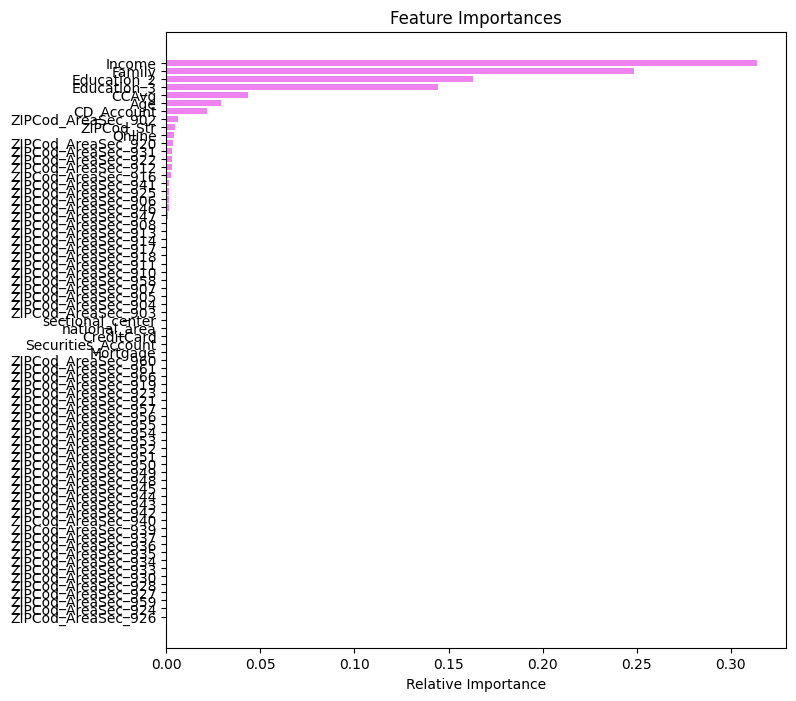

In [25]:
# Lets check what is the importance of the features for the decision tree
print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [list(X_train.columns)[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Pre Pruning
Lets do a tunning on our model, by using grid search to change the hyperparameters. so we can reduce the loss of the model.

In [26]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(6, 15),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, min_samples_leaf=10,
                       random_state=1)

Trainig Data Results
   Accuracy    Recall  Precision        F1
0  0.987714  0.873112   0.996552  0.930757
Testing Data Results
   Accuracy    Recall  Precision        F1
0  0.978667  0.785235        1.0  0.879699


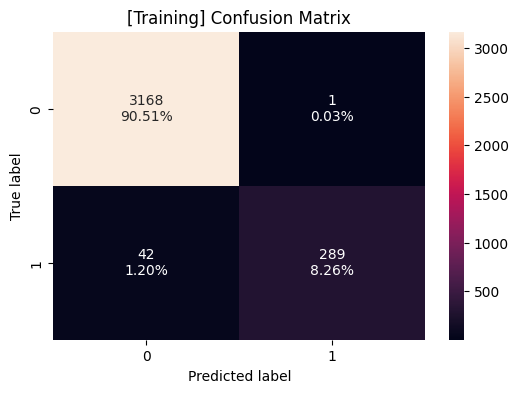

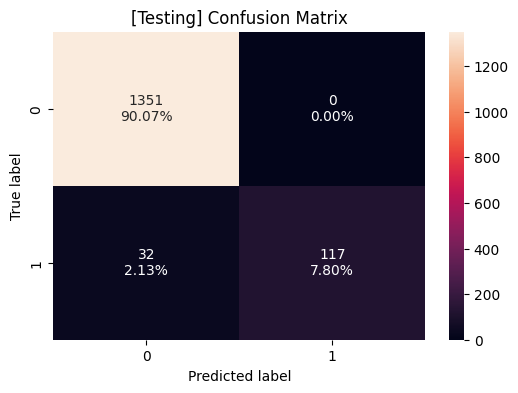

In [27]:
#Let's check the performance of the new model
print("Trainig Data Results")
decision_tree_perf_train_pre = model_performance_review(estimator, X_train, y_train, "[Training]")

print("Testing Data Results")
decision_tree_perf_test_pre = model_performance_review(estimator, X_test, y_test, "[Testing]")

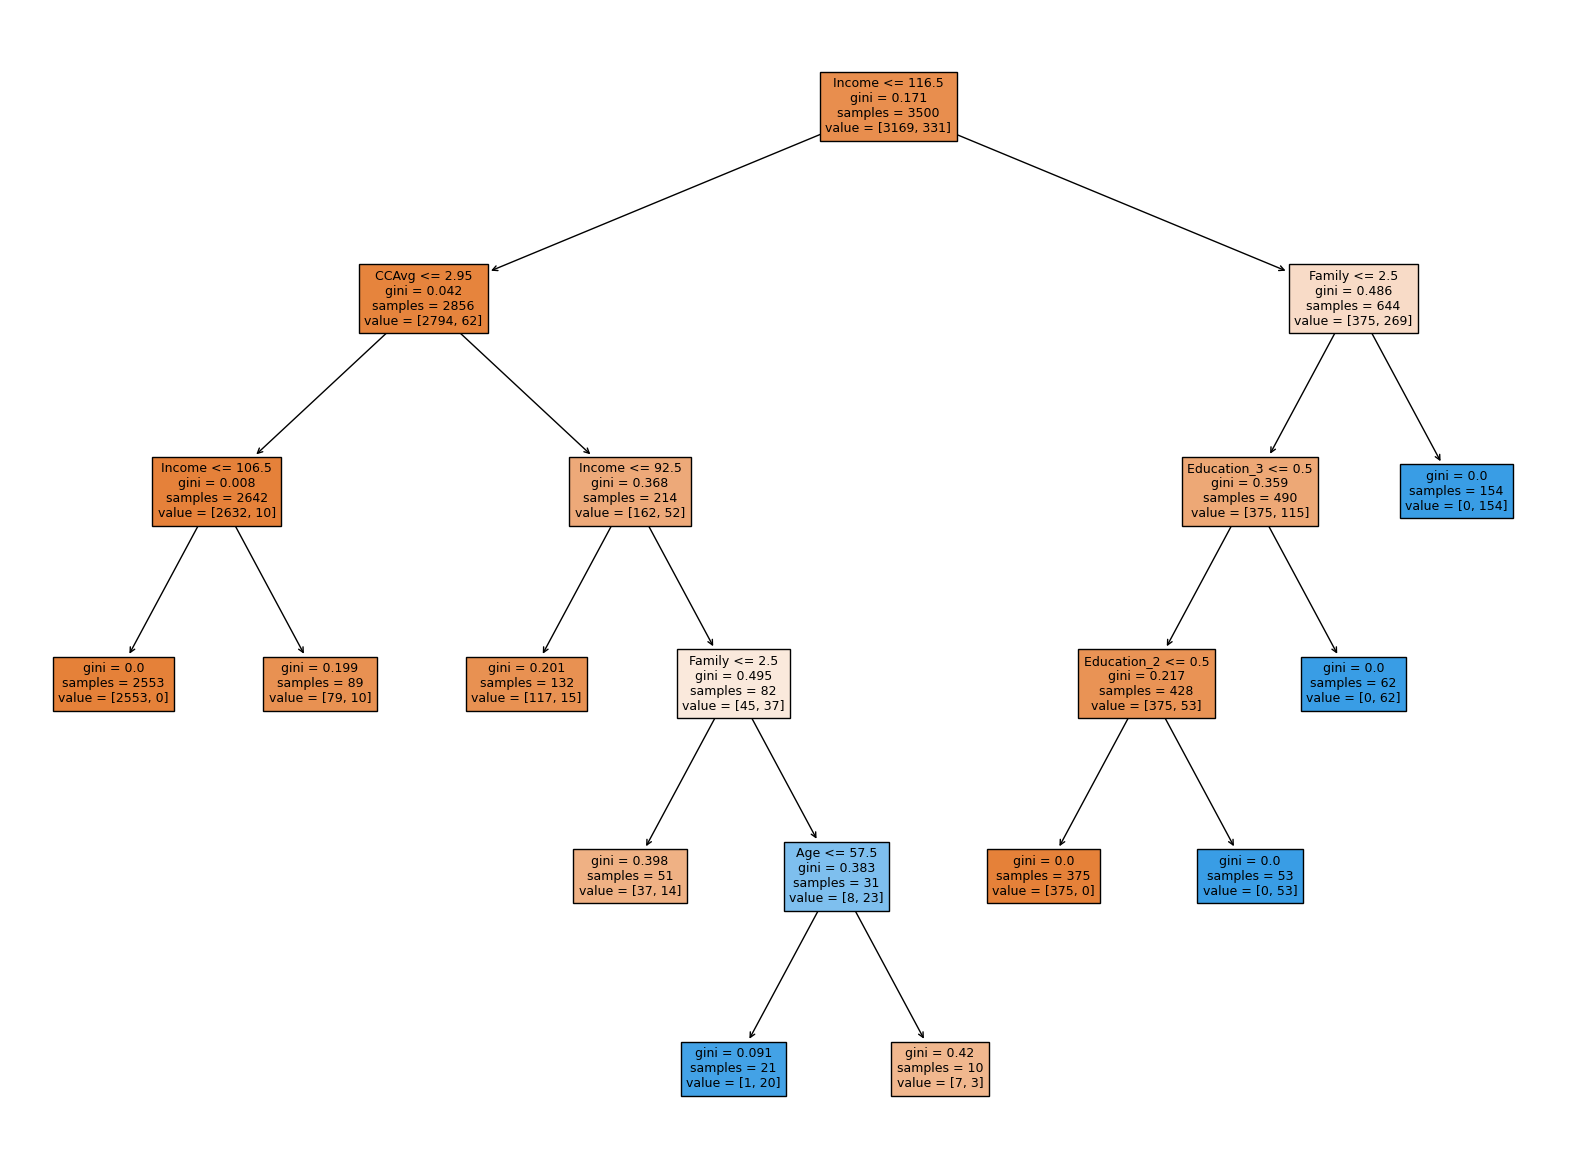

In [28]:
#let's print the tree and check how it is
print_tree(estimator, list(X_train.columns))

#### Cost-Complexity Pruning

In [29]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000224,0.001122
2,0.000250,0.001622
3,0.000269,0.003236
4,0.000276,0.003788
5,0.000277,0.004896
6,0.000381,0.005277
7,0.000476,0.005753
8,0.000506,0.008282
9,0.000527,0.008809


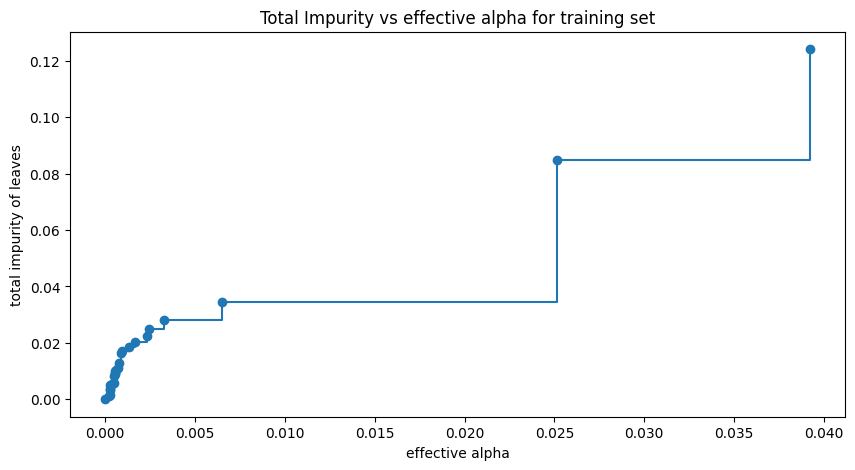

In [30]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [31]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 3 with ccp_alpha: 0.04708834100596766


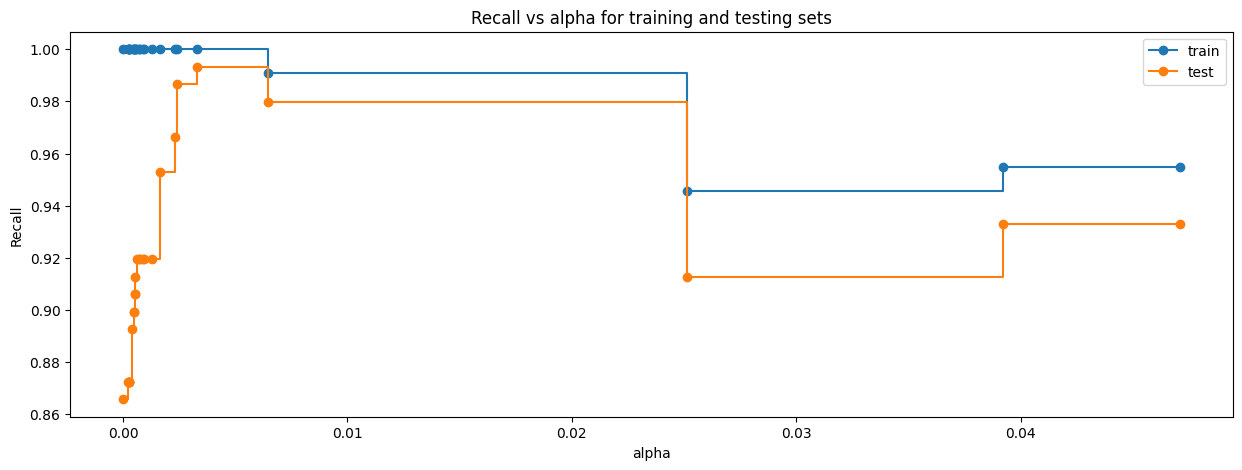

In [32]:
#Lets get the data so we can check out the results
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

#printintng out the results so we can compare them
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [33]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.003293801935470502, class_weight='balanced',
                       random_state=1)


Trainig Data Results
   Accuracy  Recall  Precision        F1
0  0.956857     1.0   0.686722  0.814268
Testing Data Results
   Accuracy    Recall  Precision        F1
0  0.948667  0.993289   0.660714  0.793566


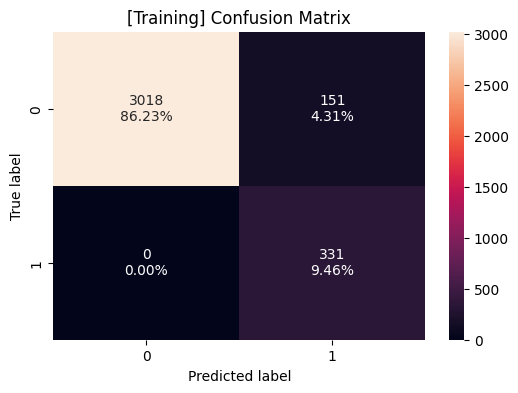

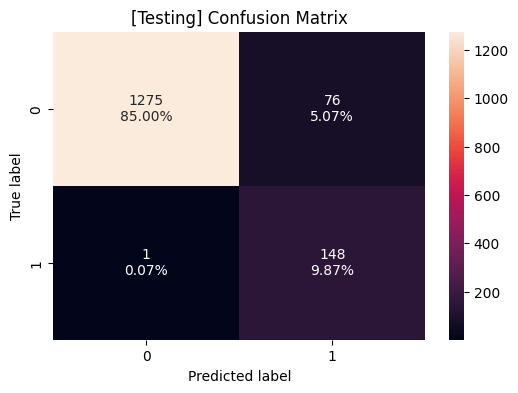

In [34]:
#need to check the results for the training data
print("Trainig Data Results")
decision_tree_perf_train_post = model_performance_review(best_model, X_train, y_train, "[Training]")

print("Testing Data Results")
decision_tree_perf_test_post = model_performance_review(best_model, X_test, y_test, "[Testing]")

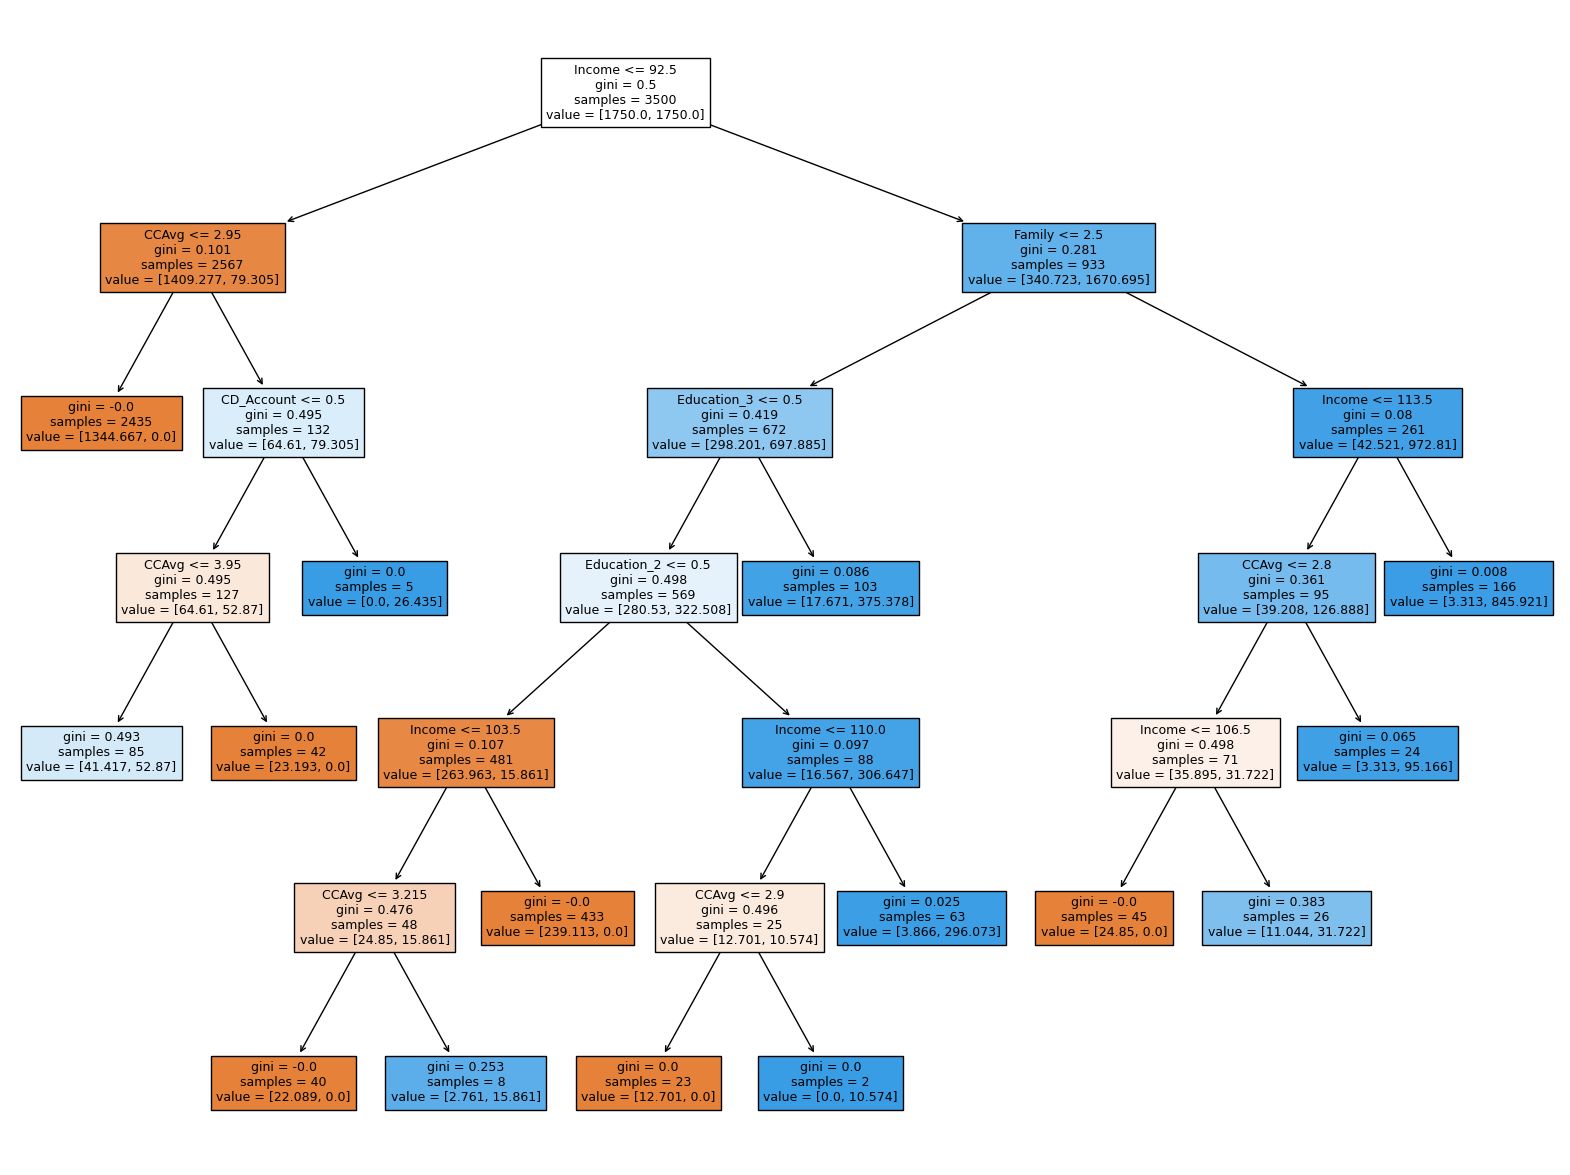

In [35]:
#let's print the tree and check how it is
print_tree(best_model, list(X_train.columns))

## Model Comparison and Final Model Selection

In [36]:
#now it is time to ccompare all the model executions so we can have a side by side comparison on the performance of the models
models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train_initial.T,
        decision_tree_perf_train_pre.T,
        decision_tree_perf_train_post.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree Initial",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
print(models_train_comp_df)


#Lets repeat the comparison but fort the testing data
models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test_initial.T,
        decision_tree_perf_test_pre.T,
        decision_tree_perf_test_post.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree Initial",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Testing performance comparison:")
print(models_test_comp_df)

Training performance comparison:
           Decision Tree Initial  Decision Tree (Pre-Pruning)  \
Accuracy                     1.0                     0.987714   
Recall                       1.0                     0.873112   
Precision                    1.0                     0.996552   
F1                           1.0                     0.930757   

           Decision Tree (Post-Pruning)  
Accuracy                       0.956857  
Recall                         1.000000  
Precision                      0.686722  
F1                             0.814268  
Testing performance comparison:
           Decision Tree Initial  Decision Tree (Pre-Pruning)  \
Accuracy                0.981333                     0.978667   
Recall                  0.872483                     0.785235   
Precision               0.935252                     1.000000   
F1                      0.902778                     0.879699   

           Decision Tree (Post-Pruning)  
Accuracy                       

### Final decision

After considering all scenarios, we see that the model that has the best performance is the found on the Decision Tree with the post-pruning. In our scenario we need to maximize recall and that is the result we achive in this case.

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

1. Given the righ correlation between the age and experince, we don't need to collect this information from our clients, at least for this analysis it does not seem to add any value to the overal view.

2. We can see that there are multiple factors involved in the decision for the loan, but there is a clear relation between the income with the loan interest and also the education level with the loan purchase, it may be a good idea for the campaing that will  be generated, that we create clusters of clients, so we taylor the message for their specific needs.

3. There is a Region (zip code) correlation with the loan, it appear that some regions may be more interest, or it may be that we just are not competitive (or don't advertise correctly) for the specific zip codes where we don't have high numeber of loans. It may be interesting to deep dive with the business on why certain zip codes may have more corelation with the loans, we can define a few campains to try to get more penetration on zip codes that we are currentlly not offering.

4. there is a good connection to folks that have certificate of deposit and have loan with the bank this may be worth exploring, as a different campaing.

___